<h2>Covid-19 seurantaa</h2>

Ajamalla koodit saat tuoreimman tilanteen.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from datetime import datetime
import matplotlib.dates as mdates

warnings.filterwarnings('ignore')

plt.style.use('ggplot')

months = mdates.MonthLocator()
months_fmt = mdates.DateFormatter('%b')

In [2]:
df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv', usecols = [1, 2, 3, 5, 8, 11, 14, 16, 44])
df.index = pd.to_datetime(df['date'], format = '%Y-%m-%d')
df.index.name = ''

In [3]:
# Jos haluat katsoa muiden maiden tietoja, niin kirjoita maiden nimet oikein:
np.sort(df['location'].unique())

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Europe', 'European Union', 'Faeroe Islands', 'Falkland Islands',
       'Fiji', 'Finland', 'Fran

In [4]:
def ilmaantuvuus(maa):
    
    df_maa = df[df['location'] == maa][['new_cases', 'new_deaths', 'population', 'reproduction_rate']]
    
    ax = (df_maa['new_cases'].rolling(14).sum() / (df_maa['population'] / 100000)).plot(figsize = (15,8), color = 'C0')
    plt.ylabel('Tartuntojen ilmaantuvuus', color = 'C0', fontsize = 14)
    
    ax2 = ax.twinx()
    (df_maa['new_deaths'].rolling(14).sum() / (df_maa['population'] / 100000)).plot(color = 'black')
    plt.ylabel('Kuolemien ilmaantuvuus', color = 'black', fontsize = 14)
    
    asukasluku = df_maa['population'][0].astype(int).astype(str)
    plt.title(maa + ' (asukasluku: ' + asukasluku + ')')
    
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(months_fmt)
    
    print(df_maa.drop('population', axis = 1).tail(7))
    

def vertaa4(maa1, maa2, maa3, maa4):
    
    df_maa1 = df[df['location'] == maa1][['new_cases', 'population']]
    pop1 = df_maa1['population'][0].astype(int).astype(str)
    df_maa2 = df[df['location'] == maa2][['new_cases', 'population']]
    pop2 = df_maa2['population'][0].astype(int).astype(str)
    df_maa3 = df[df['location'] == maa3][['new_cases', 'population']]
    pop3 = df_maa3['population'][0].astype(int).astype(str)
    df_maa4 = df[df['location'] == maa4][['new_cases', 'population']]
    pop4 = df_maa4['population'][0].astype(int).astype(str)
         
    ax = (df_maa1['new_cases'].rolling(14).sum() / (df_maa1['population'] / 100000)).plot(label = maa1 + ' ' + pop1, figsize = (14,8))
    (df_maa2['new_cases'].rolling(14).sum() / (df_maa2['population'] / 100000)).plot(label = maa2 + ' ' + pop2 )
    (df_maa3['new_cases'].rolling(14).sum() / (df_maa3['population'] / 100000)).plot(label = maa3 + ' ' + pop3 )
    (df_maa4['new_cases'].rolling(14).sum() / (df_maa4['population'] / 100000)).plot(label = maa4 + ' ' + pop4)
    plt.ylabel('Ilmaantuvuus')
    plt.legend()
    plt.title(maa1 + ' , ' +  maa2 + ' , ' + maa3 + ' & ' + maa4)
    
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(months_fmt)
    

def maanosittain(muuttuja):
    
    pivot1 = df[df['location']=='Europe'].pivot_table(values = muuttuja, index = 'date', aggfunc = 'sum')
    pivot2 = df[df['location']=='Asia'].pivot_table(values = muuttuja, index = 'date', aggfunc = 'sum')
    pivot3 = df[df['location']=='Africa'].pivot_table(values = muuttuja, index = 'date', aggfunc = 'sum')
    pivot4 = df[df['location']=='North America'].pivot_table(values = muuttuja, index = 'date', aggfunc = 'sum')
    pivot5 = df[df['location']=='South America'].pivot_table(values = muuttuja, index = 'date', aggfunc = 'sum')
    pivot6 = df[df['location']=='Oceania'].pivot_table(values = muuttuja, index = 'date', aggfunc = 'sum')

    fig, ax = plt.subplots(3, 2, sharex = True, figsize = (15, 15))
    fig.suptitle(muuttuja + ' 7 päivän liukuva keskiarvo', fontsize = 14, fontweight = 'bold')
    pivot1.rolling(7).mean().plot(ax = ax[0,0], title = 'Europe', legend = False)
    pivot2.rolling(7).mean().plot(ax = ax[0,1], title = 'Asia', legend = False)
    pivot3.rolling(7).mean().plot(ax = ax[1,0], title = 'Africa', legend = False)
    pivot4.rolling(7).mean().plot(ax = ax[1,1], title = 'North America', legend = False)
    pivot5.rolling(7).mean().plot(ax = ax[2,0], title = 'South America', legend = False)
    pivot6.rolling(7).mean().plot(ax = ax[2,1], title = 'Oceania', legend = False)

            new_cases  new_deaths  reproduction_rate
                                                    
2021-03-25      726.0         6.0               0.99
2021-03-26      512.0         2.0               0.99
2021-03-27      791.0         0.0               0.99
2021-03-28      458.0         0.0               0.99
2021-03-29      422.0         5.0               0.99
2021-03-30      420.0         4.0                NaN
2021-03-31      607.0        18.0                NaN


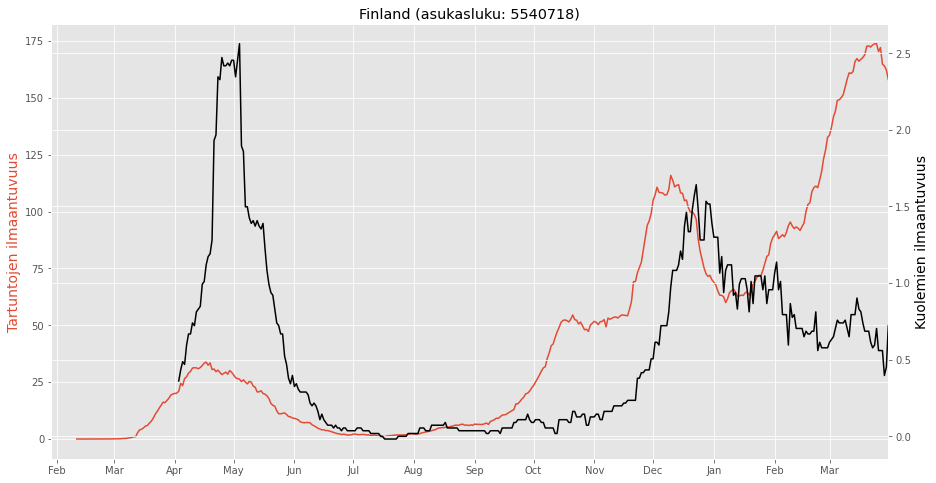

In [5]:
ilmaantuvuus('Finland')

            new_cases  new_deaths  reproduction_rate
                                                    
2021-03-25     7706.0        16.0               1.24
2021-03-26     6328.0        29.0               1.24
2021-03-27        0.0         0.0               1.24
2021-03-28        0.0         0.0               1.24
2021-03-29        0.0         0.0               1.23
2021-03-30    16427.0        28.0                NaN
2021-03-31     8441.0        35.0                NaN


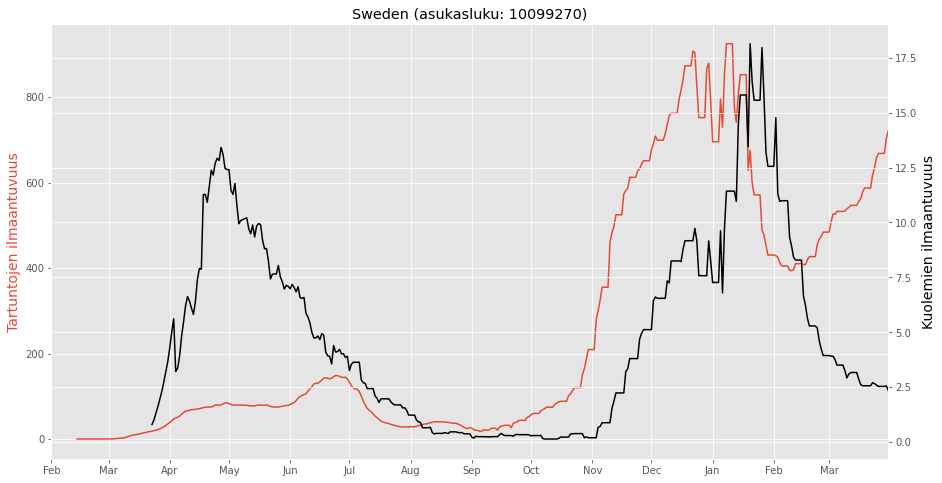

In [6]:
ilmaantuvuus('Sweden')

            new_cases  new_deaths  reproduction_rate
                                                    
2021-03-25    21620.0       185.0               1.22
2021-03-26    20689.0       159.0               1.21
2021-03-27    17628.0        87.0               1.20
2021-03-28     1727.0        44.0               1.18
2021-03-29    10297.0       180.0               1.18
2021-03-30    23681.0       250.0                NaN
2021-03-31    25014.0       200.0                NaN


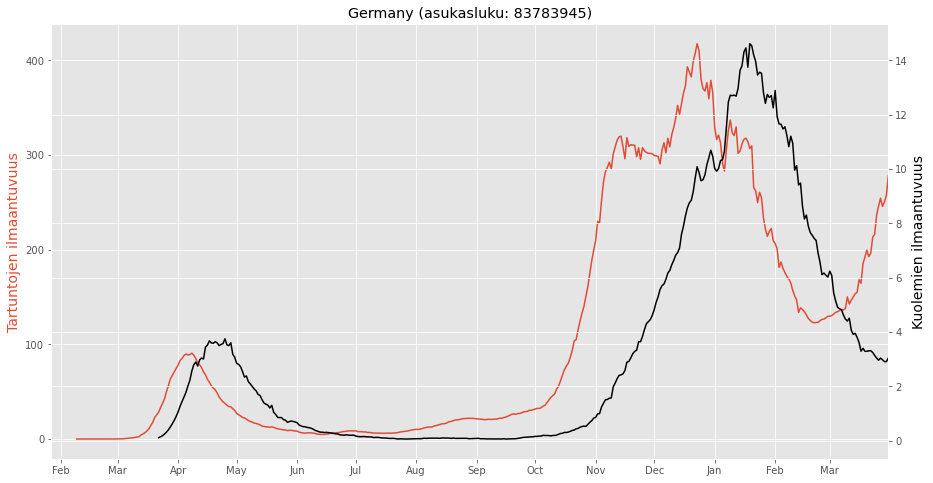

In [7]:
ilmaantuvuus('Germany')

            new_cases  new_deaths  reproduction_rate
                                                    
2021-03-25    45660.0       225.0               1.20
2021-03-26    41871.0       897.0               1.20
2021-03-27    42634.0       191.0               1.19
2021-03-28    37021.0       131.0               1.18
2021-03-29     9110.0       360.0               1.18
2021-03-30    30719.0       381.0                NaN
2021-03-31    59054.0       303.0                NaN


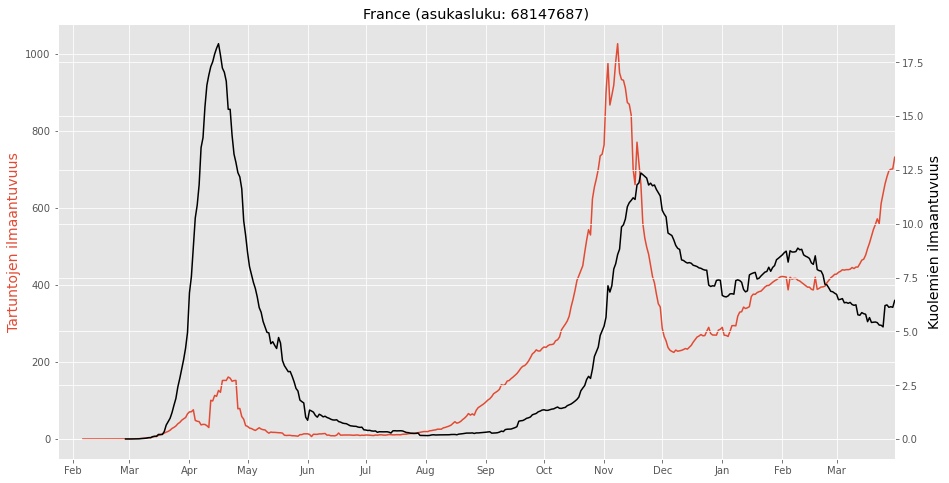

In [8]:
ilmaantuvuus('France')

            new_cases  new_deaths  reproduction_rate
                                                    
2021-03-25    13419.0       676.0               1.27
2021-03-26     7586.0       590.0               1.27
2021-03-27        0.0         0.0               1.24
2021-03-28        0.0         0.0               1.22
2021-03-29    15501.0       189.0               1.20
2021-03-30     4994.0       106.0                NaN
2021-03-31     8534.0       154.0                NaN


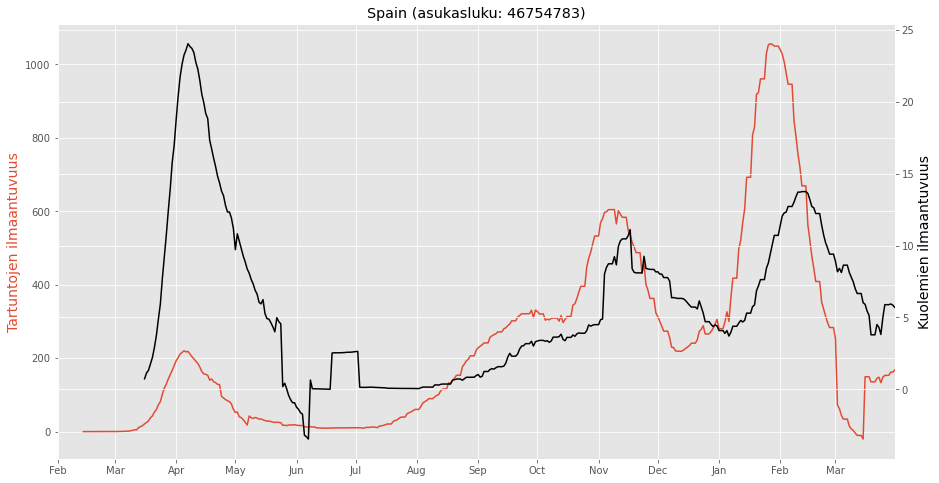

In [9]:
ilmaantuvuus('Spain')

            new_cases  new_deaths  reproduction_rate
                                                    
2021-03-25     6277.0        63.0               0.94
2021-03-26     6235.0        71.0               0.92
2021-03-27     3909.0        58.0               0.89
2021-03-28     3947.0        21.0               0.88
2021-03-29     4783.0        23.0               0.89
2021-03-30     4071.0        55.0                NaN
2021-03-31     4115.0        43.0                NaN


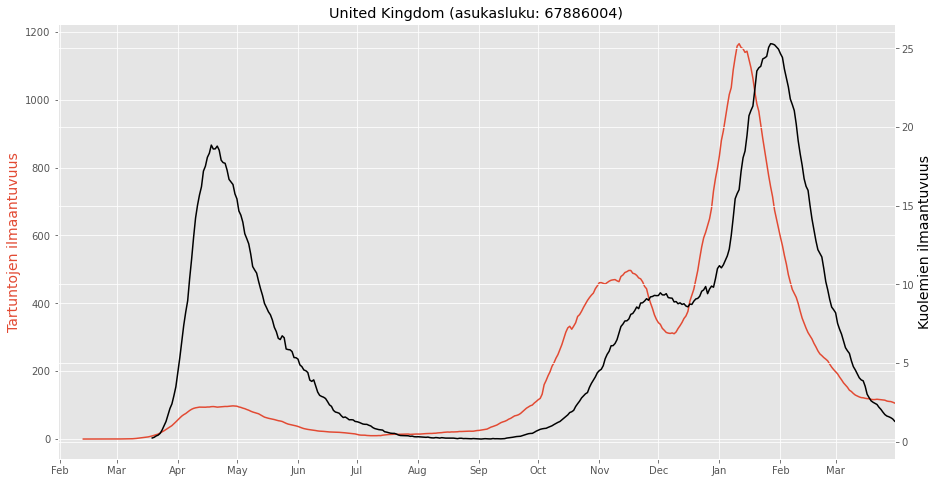

In [10]:
ilmaantuvuus('United Kingdom')

            new_cases  new_deaths  reproduction_rate
                                                    
2021-03-25    59118.0       257.0                1.4
2021-03-26    62258.0       291.0                1.4
2021-03-27    62714.0       312.0                1.4
2021-03-28    68020.0       291.0                1.4
2021-03-29    56211.0       271.0                1.4
2021-03-30    53480.0       354.0                NaN
2021-03-31    72330.0       459.0                NaN


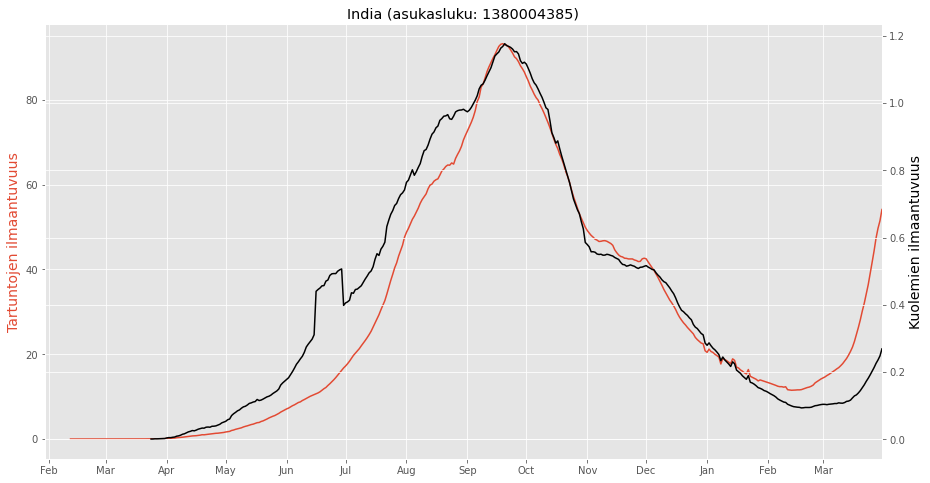

In [11]:
ilmaantuvuus('India')

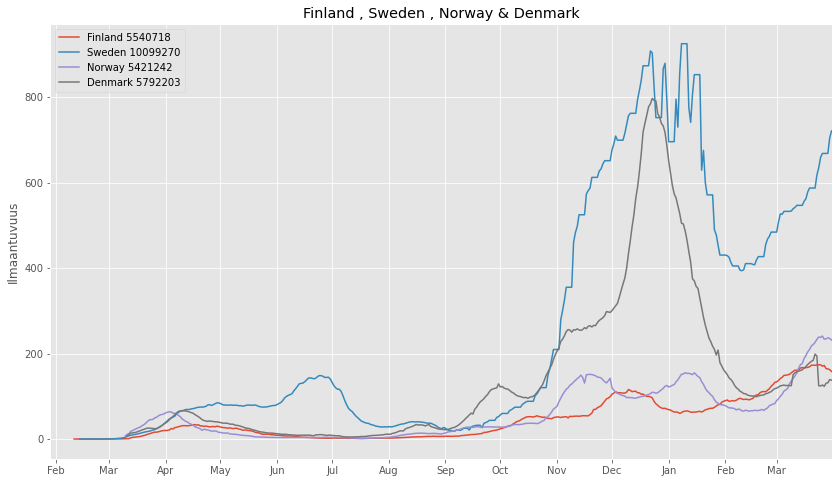

In [12]:
vertaa4('Finland', 'Sweden', 'Norway', 'Denmark')

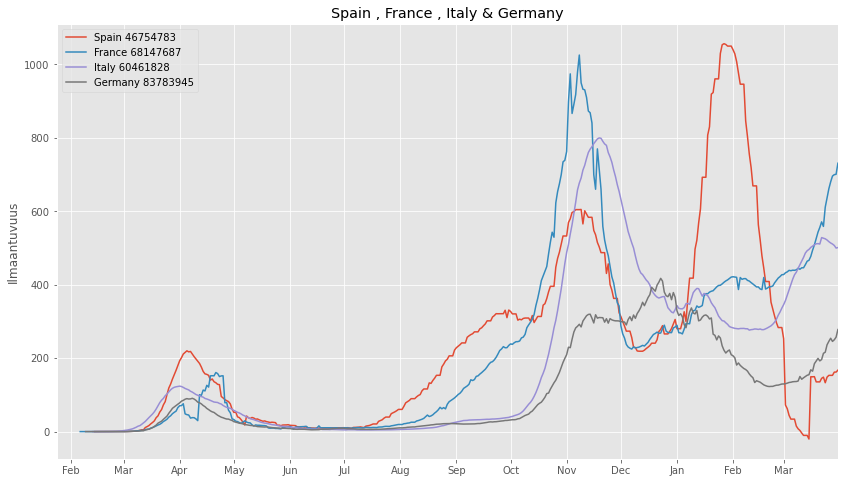

In [13]:
vertaa4('Spain', 'France', 'Italy', 'Germany')

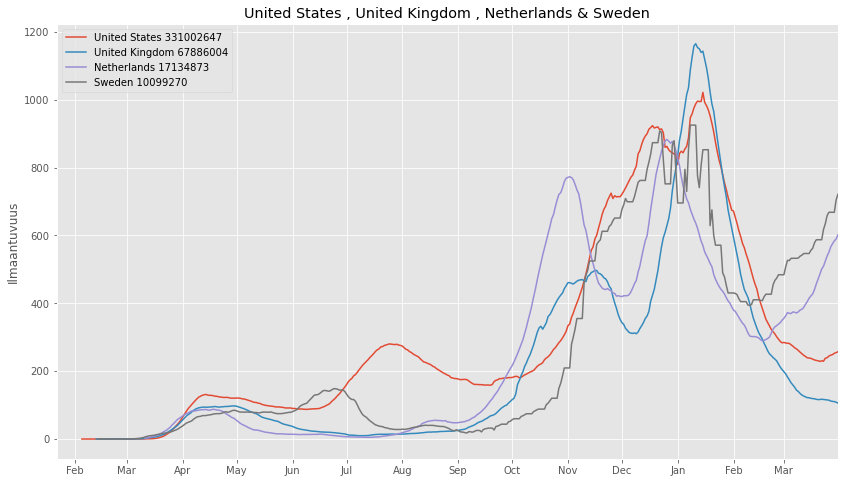

In [14]:
vertaa4('United States', 'United Kingdom', 'Netherlands', 'Sweden')

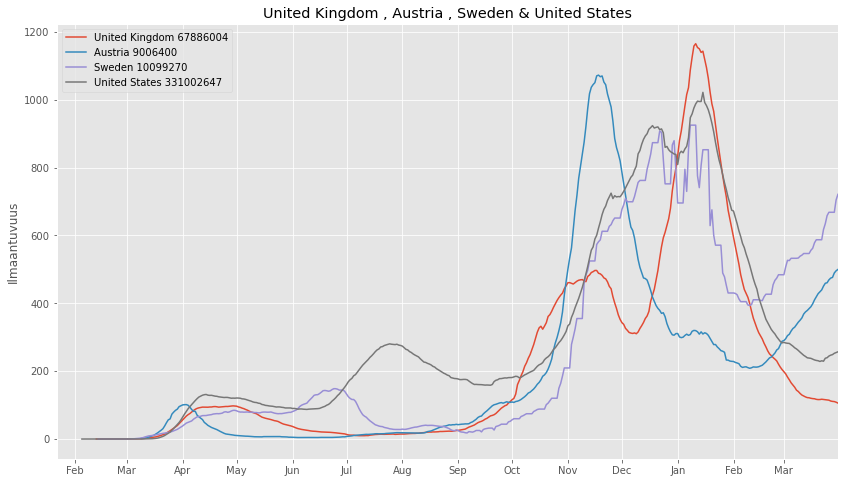

In [15]:
vertaa4('United Kingdom', 'Austria', 'Sweden', 'United States')

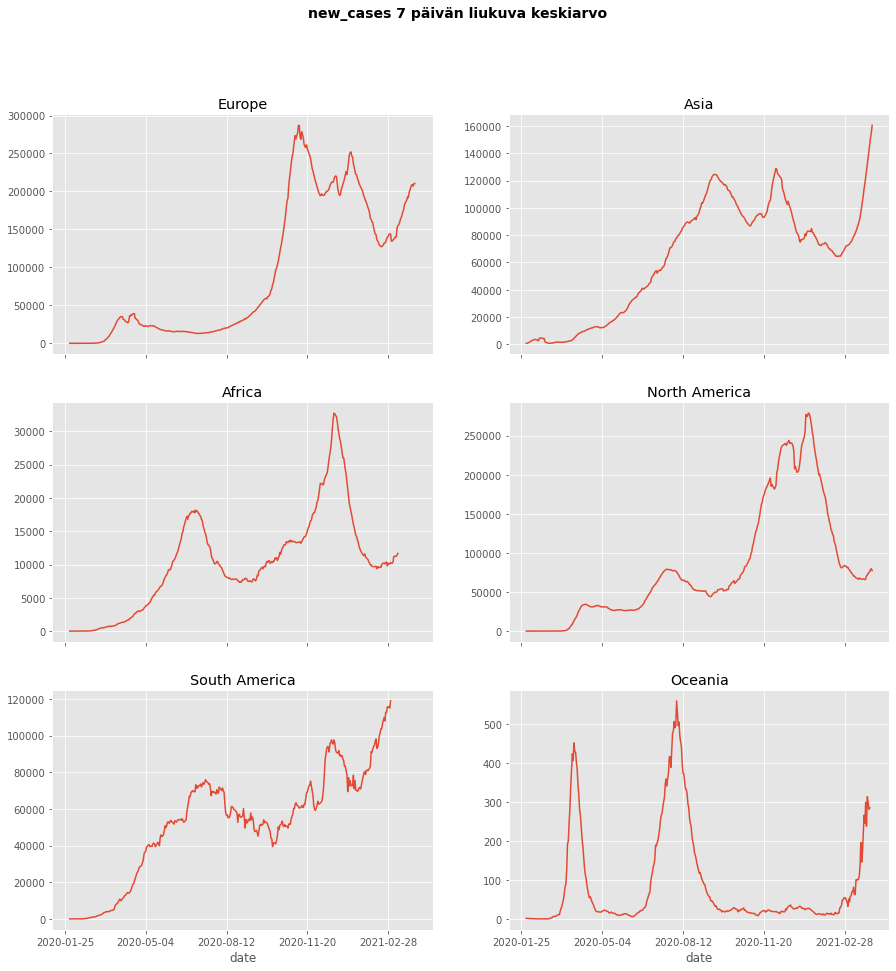

In [16]:
maanosittain('new_cases')

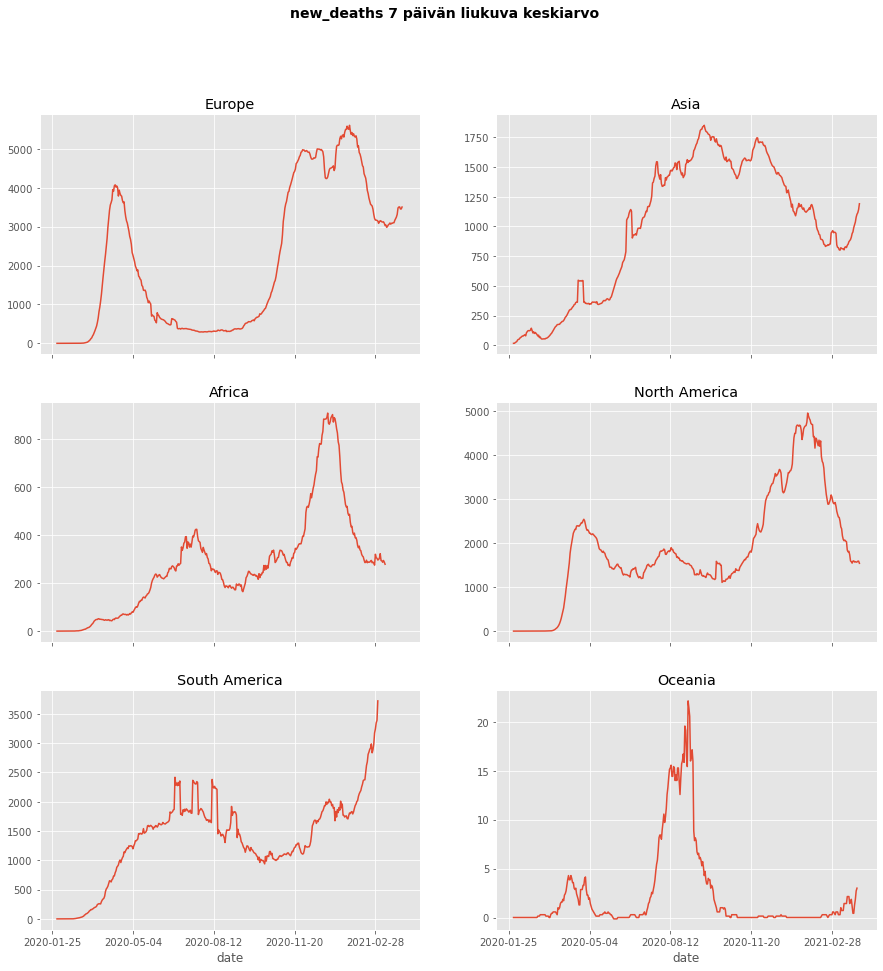

In [17]:
maanosittain('new_deaths')